In [13]:
from astropy.io import fits
import torch 
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

In [14]:
class Preprocess_image(): 
    """Preprocessing the image to have padding and good
    """
    def __init__(self, kernel, size): 
        self.kernel = kernel
        self.size = size



    def upscale(self, x, size):
        x = torch.nn.functional.interpolate(x[None, None, ...], size = size, mode='nearest')
        return x
    
    def padding_image(self, small_image, large_image):
        """

        Args:
            small_image (torch.tensor): the image to pad
            large_image (torch.tensor): the size of the image we want
        """
    
        shape_diff = np.subtract(large_image.shape, small_image.shape)
        padding = [(diff//2, diff - (diff//2)) for diff in shape_diff]
        padded_image = np.pad(small_image, padding, mode = 'constant')
        return torch.tensor(padded_image)

    def forward(self, image): 
        upscaled_image = self.upscale(image, list(self.kernel.shape))
        padded_image = self.padding_image(upscaled_image, self.kernel)
        
        return padded_image
    
   

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    4                                                  NAXIS1  =                   28                                                  NAXIS2  =                   28                                                  NAXIS3  =                    1                                                  NAXIS4  =                    1                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   2.363824596008E-05                                                  BMIN    =   1.588911645942E-05                                                  BPA     =   5.916237258911E+01          

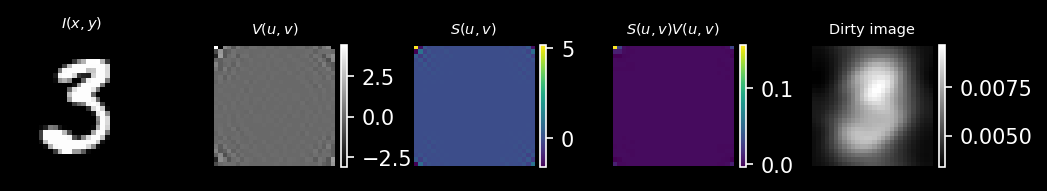

In [16]:
# Path to your .fits file
fits_file_path = '../psf_28.fits'

# Open the .fits file using Astropy
with fits.open(fits_file_path) as hdul:
    # Get the header and data from the primary HDU (Extension 0)
    header = hdul[0].header
    psf1 = torch.tensor((hdul[0].data).astype(np.float32))[0,0, ...]

# Now you can work with the header and data as needed
# For example, you can print the header and check the data shape:
print(header)
print(psf.shape)

dataset = torch.load("../../MNIST_torch/test_images.pt")
k = np.random.randint(len(dataset))
x = dataset[k].reshape(28, 28)

def ft(x): 
    return torch.fft.fft2(x, norm = "ortho")

def ift(x): 
    return torch.fft.ifft2(x, norm = "ortho")

def padding_image(small_image, large_image): 
    """

    Args:
        small_image (torch.tensor): the image to pad
        large_image (torch.tensor): the size of the image we want
    """
    
    shape_diff = np.subtract(large_image.shape, small_image.shape)
    padding = [(diff//2, diff - (diff//2)) for diff in shape_diff]
    padded_image = np.pad(small_image, padding, mode = 'constant')
    return torch.tensor(padded_image)

def upscale(image, size): 
    """Apply a bilinear interpolation to upscale the image

    Args:
        image (_type_): _description_
    """
    x = torch.nn.functional.interpolate(image[None, None, ...], size = size, mode='nearest')
    return x[0, 0]

x = upscale(x, size = list(psf.shape))
x_padded = padding_image(x, psf)
vis_full = ft(x_padded)
sampling_function= ft(psf/torch.sum(psf))
vis_sampled = sampling_function * vis_full
dirty_image = torch.fft.fftshift(ift(vis_sampled)).real

fig, axs = plt.subplots(1, 5, figsize = (8, 6), dpi =150)

titles = [r"$I(x,y)$", r"$V(u,v)$", r"$S(u,v)$", r"$S(u,v)V(u,v)$", r"Dirty image" ]
for i in range(len(axs)): 
    axs[i].axis("off")
    axs[i].set_title(titles[i], fontsize = 7)
axs[0].imshow(x_padded, cmap = "gray")


im = axs[1].imshow(vis_full.real,  cmap = "gray")
plt.colorbar(im, fraction = 0.046)


sampling_function = ift(psf)
im = axs[2].imshow(sampling_function.real)
plt.colorbar(im, fraction = 0.046)


im = axs[3].imshow(vis_sampled.real)
plt.colorbar(im, fraction = 0.046)

im = axs[4].imshow((dirty_image), cmap = "gray")
plt.colorbar(im, fraction = 0.046)

plt.subplots_adjust(wspace = 0.5)

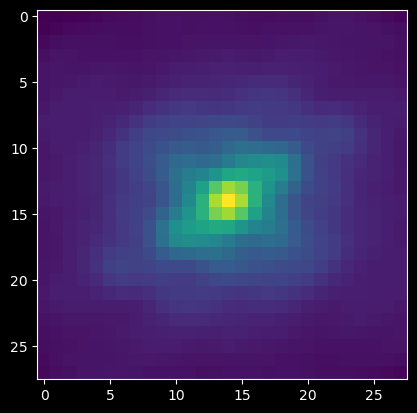

In [17]:
plt.imshow(psf1)

In [29]:
psf[low:high, low:high]-psf1

tensor([[-9.5386e-05, -1.8426e-04, -1.8195e-04, -1.3698e-04, -7.0073e-05,
          3.5390e-06,  8.0243e-05,  1.6972e-04,  2.6421e-04,  3.3668e-04,
          3.7165e-04,  3.5957e-04,  3.1258e-04,  2.5851e-04,  2.0090e-04,
          1.4822e-04,  1.0917e-04,  7.5176e-05,  5.3629e-05,  5.9977e-05,
          1.0519e-04,  1.7734e-04,  2.4112e-04,  2.8075e-04,  2.9537e-04,
          2.9339e-04,  2.8009e-04,  2.6927e-04],
        [ 1.1627e-04,  7.9229e-05,  9.8243e-05,  1.0698e-04,  8.8908e-05,
          4.1753e-05, -3.2842e-05, -1.2717e-04, -2.2834e-04, -3.2050e-04,
         -3.8744e-04, -4.2053e-04, -4.1968e-04, -3.8671e-04, -3.2589e-04,
         -2.4828e-04, -1.7019e-04, -1.0426e-04, -5.6066e-05, -3.2984e-05,
         -4.0606e-05, -7.3835e-05, -1.2361e-04, -1.7966e-04, -2.3270e-04,
         -2.7197e-04, -2.9054e-04, -2.5309e-04],
        [ 1.0917e-04, -3.2827e-05, -9.9950e-05, -1.3312e-04, -1.4082e-04,
         -1.2112e-04, -7.7143e-05, -9.4250e-06,  7.8350e-05,  1.7295e-04,
          2.61

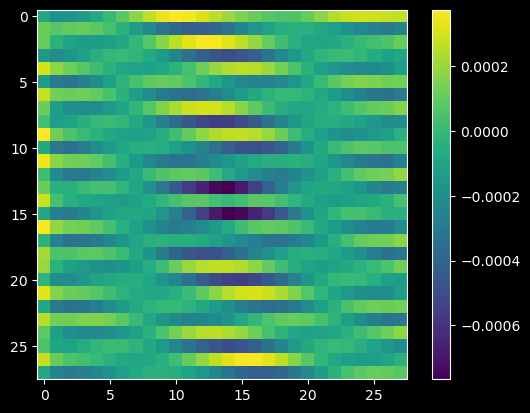

In [30]:
low = int((256-28)/2)
high = int((256 + 28)/2)
plt.imshow(psf[low:high, low:high]-psf1)
plt.colorbar()

## Same thing with the 512 psf 

torch.Size([256, 256])


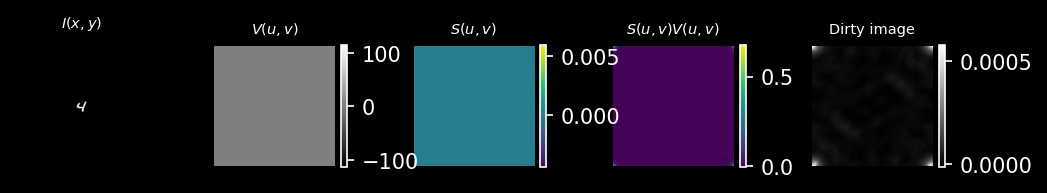

In [18]:
import torch.nn.functional as F

# Path to your .fits file
fits_file_path = '../psf_256.fits'

# Open the .fits file using Astropy
with fits.open(fits_file_path) as hdul:
    # Get the header and data from the primary HDU (Extension 0)
    header = hdul[0].header
    psf = torch.tensor((hdul[0].data).astype(np.float32))[0,0, ...]

print(psf.shape)

####
dataset = torch.load("../../MNIST_torch/test_images.pt")
k = np.random.randint(len(dataset))
x = dataset[k].reshape(28, 28)

pad_size = (psf.shape[-1] - x.shape[-1])//2

x = F.pad(x, (pad_size, pad_size, pad_size, pad_size), mode='constant', value=0)

def ft(x): 
    return torch.fft.fft2(x)

def ift(x): 
    return torch.fft.ifft2(x)

fig, axs = plt.subplots(1, 5, figsize = (8, 6), dpi =150)
titles = [r"$I(x,y)$", r"$V(u,v)$", r"$S(u,v)$", r"$S(u,v)V(u,v)$", r"Dirty image" ]
for i in range(len(axs)): 
    axs[i].axis("off")
    axs[i].set_title(titles[i], fontsize = 7)

axs[0].imshow(x, cmap = "gray")
vis_full = ft(x)

im = axs[1].imshow(vis_full.real,  cmap = "gray")
plt.colorbar(im, fraction = 0.046)


sampling_function = ift(psf)
im = axs[2].imshow(sampling_function.real)
plt.colorbar(im, fraction = 0.046)

vis_sampled = sampling_function * vis_full

im = axs[3].imshow(vis_sampled.real)
plt.colorbar(im, fraction = 0.046)
dirty_image = ift(vis_sampled)


im = axs[4].imshow((dirty_image).real, cmap = "gray")
plt.colorbar(im, fraction = 0.046)

plt.subplots_adjust(wspace = 0.5)

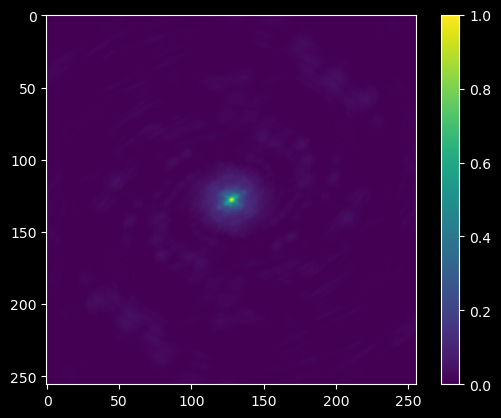

In [31]:
plt.imshow(psf, vmin = 0, vmax = 1)
plt.colorbar()

In [6]:
torch.sum(psf)

tensor(387.6453)

In [139]:
(psf.shape[-1] - x.shape[-1])//2

0

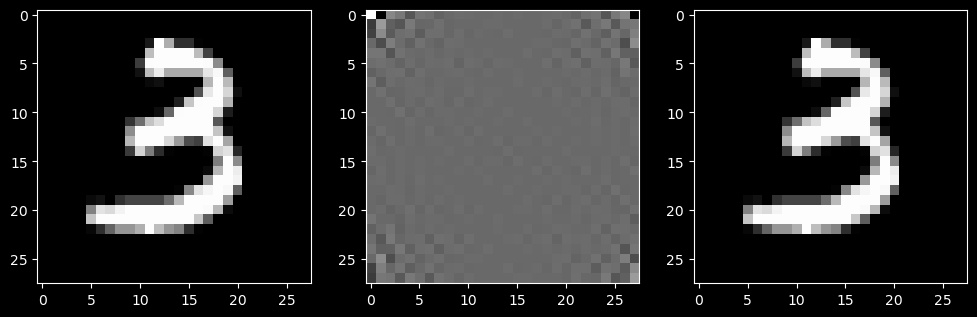

In [126]:
k = np.random.randint(len(dataset))
img_size = 28
x = dataset[k].reshape(img_size, img_size)
fig, axs = plt.subplots(1, 3, figsize = (12, 4))

axs[0].imshow(x, cmap = "gray")
axs[1].imshow(ft(x).real, cmap = "gray")
axs[2].imshow(ift(ft(x)).real, cmap = 'gray')

import torch.nn.functional as F
# Assuming you have a 3-channel image with shape (batch_size, channels, height, width)
# and you want to add padding of size 'pad_size' on all sides.

# Sample image tensor with shape (1, 3, 32, 32)
batch_size = 1

# Define the size of the padding you want to add
pad_size = (psf.shape[-1] - x.shape[-1])//2

# Add padding to the image
padded_image = F.pad(x, (pad_size, pad_size, pad_size, pad_size), mode='constant', value=0)

# The F.pad function takes a tuple of four values (left, right, top, bottom) to specify padding on each side.
# The 'mode' parameter specifies how the padding is filled. 'constant' pads with a constant value, and 'value' parameter defines the constant value.

# The resulting 'padded_image' will have dimensions (1, 3, 42, 42) if 'pad_size' is 5.


(-0.5, 255.5, 255.5, -0.5)

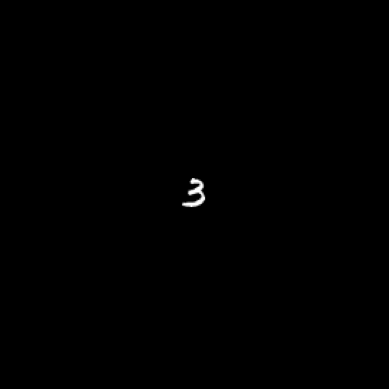

In [127]:
plt.imshow(padded_image, cmap = "gray")
plt.axis("off")

In [128]:
vis_full = ft(padded_image)
sampling_function = ift(psf)
vis_sampled = sampling_function * vis_full
# Cropping the image (i.e. removing the padding)
pad_dims = padded_image.shape[-1]
cropped_vis = vis_sampled[pad_dims//2:pad_dims//2+img_size, pad_dims//2:pad_dims//2 + img_size]
cropped_vis.shape

torch.Size([28, 28])

Text(0.5, 1.0, 'cropped')

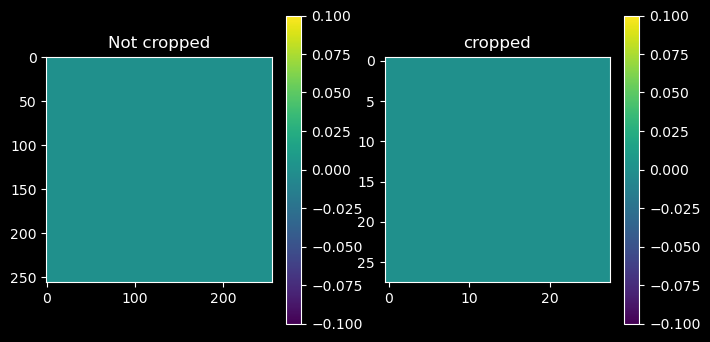

In [129]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4))
im = axs[0].imshow(ift(vis_sampled).real)
axs[0].set_title("Not cropped")
plt.colorbar(im)
im = axs[1].imshow(ift(cropped_vis).real)
plt.colorbar(im)
axs[1].set_title("cropped")

In [132]:
vis_sampled.real.max()

tensor(0.)

In [63]:
cropped_vis.shape

torch.Size([28, 28])

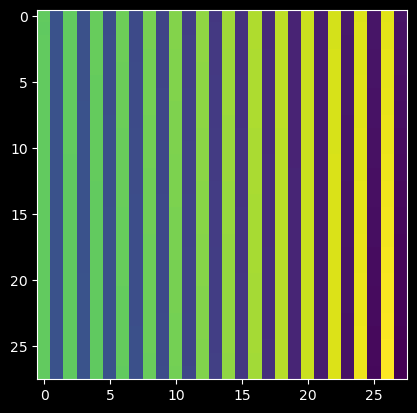

In [64]:
plt.imshow(cropped_vis.real)